## Build DecisionTree model to predict survival based on certain parameters
Using following columns build a model to predict if person would survive or not,

    1.Pclass  
    2.Sex
    3.Age
    4.Fare
Calculate score of your model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# these features does not contribute anything in the prediction process

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
# assigning feature and target variables
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [6]:
# direct creation of dummy_variables
#'sex' consists of only 2 categories. so assign numerical alternatives.
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [7]:
#c'age' attribute contains missing values
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [8]:
#handle missing values
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [9]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [11]:
print(len(X_train))
print(len(X_test))

712
179


In [12]:
#training
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_predicted = model.predict(X_test)

In [14]:
#accuracy
model.score(X_test,y_test)

0.776536312849162

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[91, 14],
       [26, 48]], dtype=int64)

Text(51.0, 0.5, 'Truth')

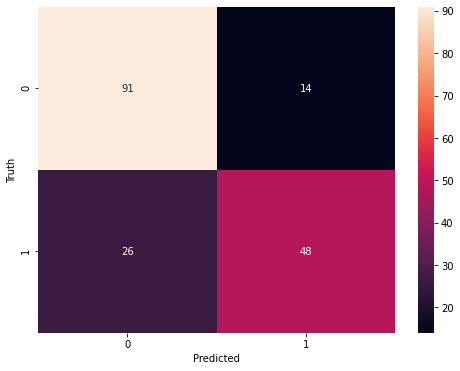

In [16]:
# to visualise confusion matrix
import seaborn as sn
plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Inference on Confusion Matrix

In [17]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
print('TN: {}, TP: {}, FP: {}, FN:{}'.format(TN,TP,FP,FN))

TN: 91, TP: 48, FP: 14, FN:26


In [18]:
# accuracy - manual calculation
print('Accuracy:',(TP+TN)/256)
print('Precision:',TP/(TP+FP))
print('Recall:',TP/(TP+FN))

Accuracy: 0.54296875
Precision: 0.7741935483870968
Recall: 0.6486486486486487


## Note:
**The accuracy of model is too low.**<br>
**Complex Hyperparameter Turning to improve the model accuracy will be performed in future projects.**